# Regressors for Symptoms $\rightarrow$ Disease

#### Import dataset

In [1]:
from create_datasets import SymptomDiseaseData
data = SymptomDiseaseData()
train, val, test, train_y, val_y, test_y = data.generate_data()
data.get_data_insight()

Symptom's shape: (890, 18)
Disease's shape: (890, 3)
Symptoms at index 0:
 [ 0 10  0  0  0  0  0  3  0  2  1  0  0  0  0  0  1  0]
Disease at index 0:
 [  7   0 136]


#### Import things always needed

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as sci

#### MLP

In [9]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout

DROPOUT_RATE = .5

model = Sequential()
model.add(Dense(256, input_dim=18))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(3))
# model.add(Activation('relu')) # may take out and test later...
model.compile(optimizer='adam',
              loss='mean_squared_error')

hist = model.fit(train, train_y, epochs=500, batch_size=64, verbose=0, validation_data=(val, val_y))

print('Final loss:', hist.history['val_loss'][-1])

pred = model.predict(test, verbose=0)

Final loss: 2865610.873120301


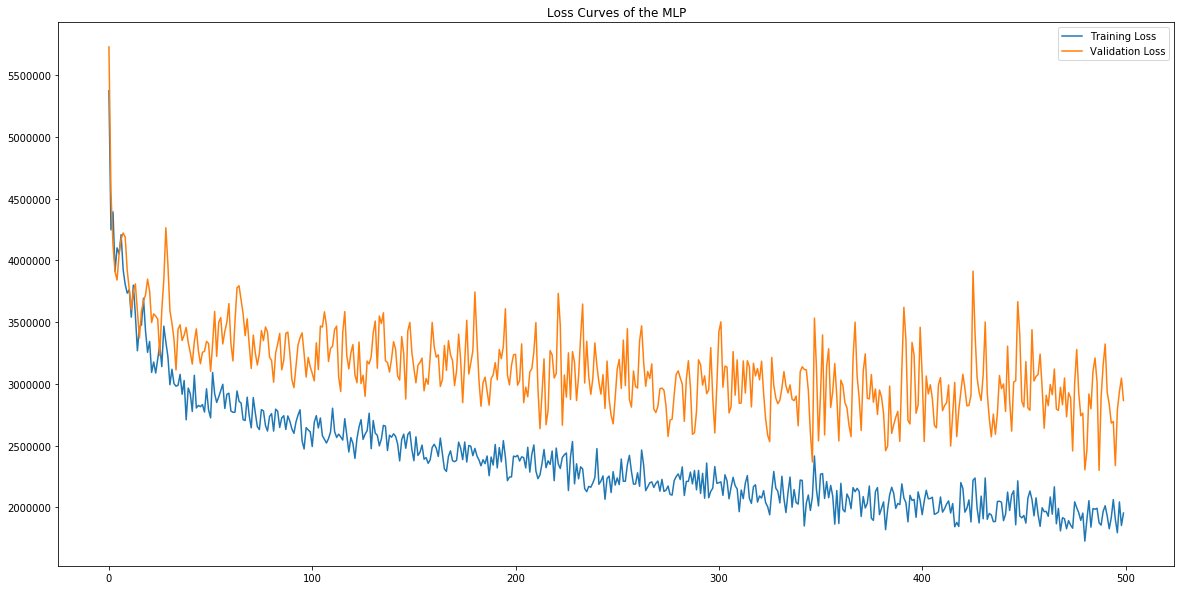

In [10]:
plt.figure(figsize=(20,10))
plt.title("Loss Curves of the MLP")
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

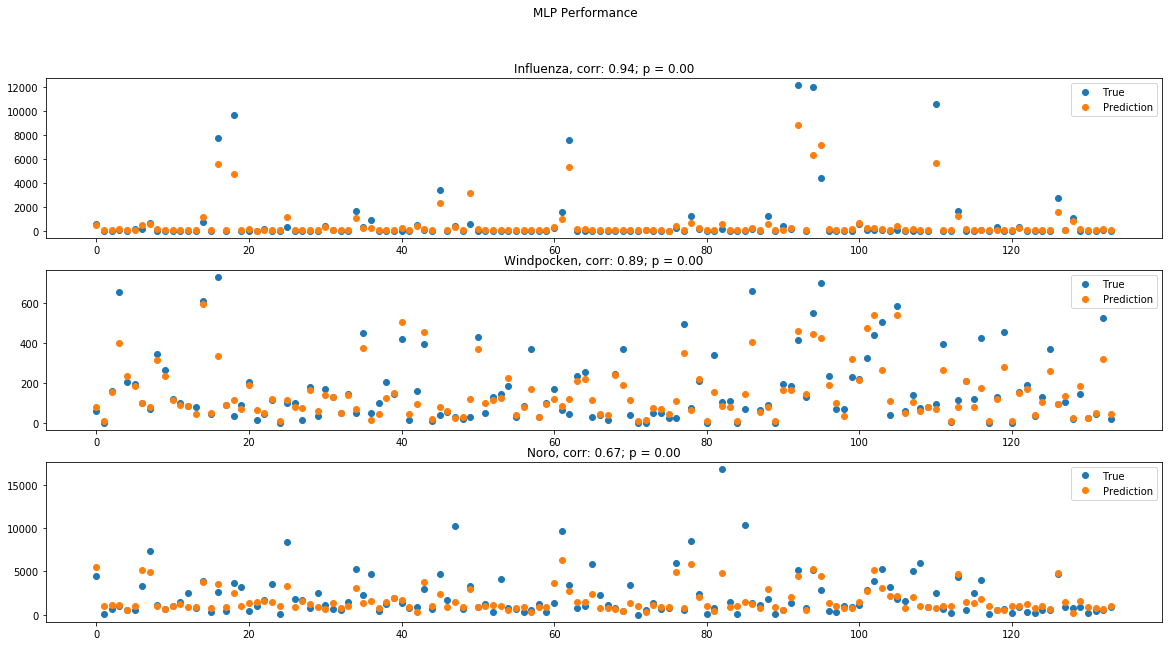

In [16]:
diseases = ['Influenza', 'Windpocken', 'Norovirus-Gastroenteritis']
zoom = False
bottom = 250
top = 350

corr = []
p = []

for i in range(3):
    out = sci.pearsonr(test_y.T[i], pred.T[i])
    corr.append(out[0])
    p.append(out[1])
    
f, axarr = plt.subplots(3, figsize=(20, 10))
f.size=((20,20))
f.suptitle("MLP Performance")

axarr[0].plot(test_y.T[0], 'o', label='True')
axarr[0].plot(pred.T[0], 'o', label='Prediction')
if zoom: axarr[0].set_xlim([bottom,top])
axarr[0].legend()
axarr[0].set_title('Influenza, corr: {:.2f}; p = {:.2f}'.format(corr[0], p[0]))

axarr[1].plot(test_y.T[1], 'o', label='True')
axarr[1].plot(pred.T[1], 'o', label='Prediction')
if zoom: axarr[1].set_xlim([bottom,top])
axarr[1].legend()
axarr[1].set_title('Windpocken, corr: {:.2f}; p = {:.2f}'.format(corr[1], p[1]))

axarr[2].plot(test_y.T[2], 'o', label='True')
axarr[2].plot(pred.T[2], 'o', label='Prediction')
if zoom: axarr[2].set_xlim([bottom,top])
axarr[2].legend()
axarr[2].set_title('Noro, corr: {:.2f}; p = {:.2f}'.format(corr[2], p[2]))

plt.show()

# ---------------

#### Random Forest Regressor
We will cross validate on various shuffles of the dataset.

In [17]:
from sklearn.ensemble import RandomForestRegressor


from create_datasets import SymptomDiseaseData


score = []
models = []
averages = []
CROSS_VAL_RUNS = 10

print('Analyzing model on validation data...')
print("Regressing with 9 features and 20 estimators...")

for i in range(CROSS_VAL_RUNS):
    rf_9 = RandomForestRegressor(n_estimators=20, verbose=1, random_state=708, max_features=9)
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    rf_9.fit(train, train_y)
    pred_9 = rf_9.predict(val)
    score.append(np.mean((val_y-pred_9)**2))
    models.append(rf_9)

mean = np.mean(score)
averages.append(mean)
models.append(rf_9)
print('Mean error of rf_9:', mean)
score = []

print("Regressing with 18 features and 20 estimators...")

for i in range(CROSS_VAL_RUNS):
    rf_18 = RandomForestRegressor(n_estimators=20, verbose=1, random_state=708, max_features=18)
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    rf_18.fit(train, train_y)
    pred_18 = rf_18.predict(val)
    score.append(np.mean((val_y-pred_18)**2))
    models.append(rf_18)

mean = np.mean(score)
averages.append(mean)
models.append(rf_18)
print('Mean error of rf_18:', mean)
score = []

print("Regressing with 9 features and 40 estimators...")

for i in range(CROSS_VAL_RUNS):
    rf40_9 = RandomForestRegressor(n_estimators=40, verbose=1, random_state=708, max_features=9)
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    rf40_9.fit(train, train_y)
    pred40_9 = rf40_9.predict(val)
    score.append(np.mean((val_y-pred40_9)**2))
    models.append(rf40_9)

mean = np.mean(score)
averages.append(mean)
models.append(rf40_9)
print('Mean error of rf40_9:', mean)
score = []

print("Regressing with 18 features and 40 estimators...")

for i in range(CROSS_VAL_RUNS):
    rf40_18 = RandomForestRegressor(n_estimators=40, verbose=1, random_state=708, max_features=18)
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    rf40_18.fit(train, train_y)
    pred40_18 = rf40_18.predict(val)
    score.append(np.mean((val_y-pred40_18)**2))
    models.append(rf40_18)

mean = np.mean(score)
averages.append(mean)
models.append(rf40_18)
print('Mean error of rf40_18:', mean)
score = []

print("Regressing with 18 features and 100 estimators...")

for i in range(CROSS_VAL_RUNS):
    rf100_18 = RandomForestRegressor(n_estimators=100, verbose=1, random_state=708, max_features=18)
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    rf100_18.fit(train, train_y)
    pred100_18 = rf100_18.predict(val)
    score.append(np.mean((val_y-pred100_18)**2))
    models.append(rf100_18)

mean = np.mean(score)
averages.append(mean)
models.append(rf100_18)
print('Mean error of rf100_18:', mean)
score = []

best_model = index = np.argmin(averages)
best_model = models[best_model]

model_names = {'1':'rf_9', '2':'rf_18', '3':'rf40_9', '4':'rf40_18', '5':'rf100_18'}

Analyzing model on validation data...
Regressing with 9 features and 20 estimators...


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Mean error of rf_9: 2082595.142179811
Regressing with 18 features and 20 estimators...


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Mean error of rf_18: 2161615.439175262
Regressing with 9 features and 40 estimators...


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Mean error of rf40_9: 2006505.0640721894
Regressing with 18 features and 40 estimators...


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Mean error of rf40_18: 2377586.425197701
Regressing with 18 features and 100 estimators...


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Mean error of rf100_18: 2346030.50567931


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [18]:
print("Running best model ({}) on the test set...".format(model_names[str(index)]))

for i in range(CROSS_VAL_RUNS):
    data = SymptomDiseaseData()
    train, val, test, train_y, val_y, test_y = data.generate_data() # reshuffle data
    pred = best_model.predict(test)
    score.append(np.mean((test_y-pred)**2))

mean = np.mean(score)
print('Mean error of best model ({}): {}'.format(model_names[str(index)], mean))

Running best model (rf_18) on the test set...


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


Mean error of best model (rf_18): 683010.1430258756


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


#### Plot results of the random forest classifier

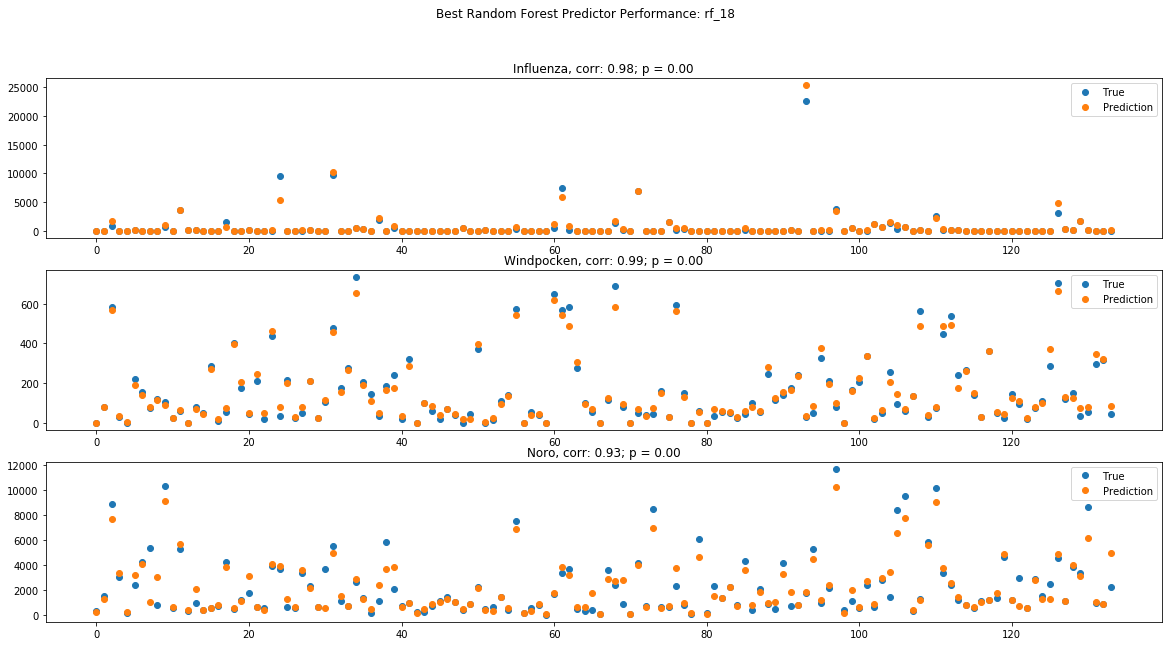

In [19]:
diseases = ['Influenza', 'Windpocken', 'Norovirus-Gastroenteritis']
zoom = False
bottom = 250
top = 350

corr = []
p = []

for i in range(3):
    out = sci.pearsonr(test_y.T[i], pred.T[i])
    corr.append(out[0])
    p.append(out[1])
    
f, axarr = plt.subplots(3, figsize=(20, 10))
f.size=((20,20))
f.suptitle("Best Random Forest Predictor Performance: {}".format(model_names[str(index)]))

axarr[0].plot(test_y.T[0], 'o', label='True')
axarr[0].plot(pred.T[0], 'o', label='Prediction')
if zoom: axarr[0].set_xlim([bottom,top])
axarr[0].legend()
axarr[0].set_title('Influenza, corr: {:.2f}; p = {:.2f}'.format(corr[0], p[0]))

axarr[1].plot(test_y.T[1], 'o', label='True')
axarr[1].plot(pred.T[1], 'o', label='Prediction')
if zoom: axarr[1].set_xlim([bottom,top])
axarr[1].legend()
axarr[1].set_title('Windpocken, corr: {:.2f}; p = {:.2f}'.format(corr[1], p[1]))

axarr[2].plot(test_y.T[2], 'o', label='True')
axarr[2].plot(pred.T[2], 'o', label='Prediction')
if zoom: axarr[2].set_xlim([bottom,top])
axarr[2].legend()
axarr[2].set_title('Noro, corr: {:.2f}; p = {:.2f}'.format(corr[2], p[2]))

# plt.tight_layout()
plt.show()

In [20]:
pickle.dump(best_model, open('random_forest.pkl', 'wb'))